In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings
from scipy.signal import find_peaks
warnings.filterwarnings("ignore", category=FutureWarning, module="librosa")

ModuleNotFoundError: No module named 'librosa'

In [48]:
def detect_peaks(data):
    # Compute absolute difference between consecutive frames
    movement = np.abs(np.diff(data))
    peaks, _ = find_peaks(movement, height=np.mean(movement) + np.std(movement),
                      prominence=0.05, width=1, distance=2)
    return peaks   
def is_speaking_energy(y, sr, threshold=0.01):
    energy = np.sum(np.abs(y) ** 2) / len(y)  # Compute energy
    print(energy)
    return energy > threshold  # Check if above threshold
def detect_speech_segments(audio_path, sr=16000, frame_length=0.05, fps=30, energy_threshold=0.01):
    # Load audio
    y, sr = librosa.load(audio_path, sr=sr, mono=True)

    # Calculate frame size and hop length
    frame_size = int(sr * frame_length)  # 50ms window
    hop_length = int(sr / fps)  # Hop length to match video FPS (e.g., 30fps)

    # Compute short-time energy
    energy = np.array([
        np.sum(np.square(y[i:i+frame_size]))  # Energy per frame
        for i in range(0, len(y) - frame_size, hop_length)
    ])

    # Determine speech frames where energy is above threshold
    threshold = np.mean(energy) + np.std(energy)  # Dynamic threshold
    print(threshold)
    speech_segments = energy > threshold

    return np.sum(speech_segments)  # Count frames where speech is detected

In [55]:
video_path = r'D:\Programming\Python\AI\Basics\AMNIL Tech\Liveness Detection\lip_movement\video\real\real3.mp4'

# Load audio using librosa
y, sr = librosa.load(video_path, sr=16000, mono=True)        

# Calculate hop_length and frame_length to match video frames
hop_length = int(sr / 30)  # Hop length to match video frame rate
frame_length = int(sr * 0.05)  # 50ms window (can be adjusted) 

C:\Users\aanki\AppData\Local\Temp\ipykernel_10860\3557084417.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(video_path, sr=16000, mono=True)


In [56]:
detect_speech_segments(video_path)

C:\Users\aanki\AppData\Local\Temp\ipykernel_10860\4250119765.py:13: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=sr, mono=True)


1.2454695


13

0.0005580004544909554
Speaking: False
Audio Changes:  5


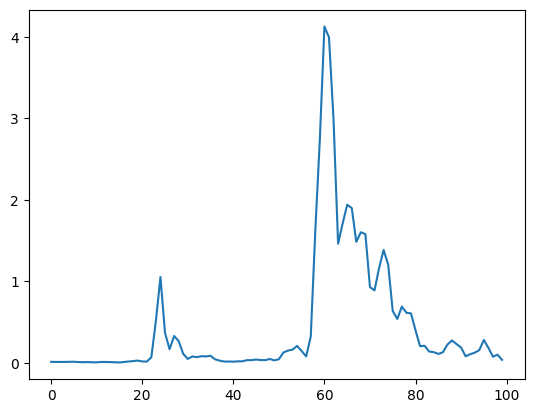

In [57]:
# Calculate short-time energy
audio_energy = np.array([
    sum(abs(y[i:i+frame_length])**2)
    for i in range(0, len(y), hop_length)
])
audio_changes = len(detect_peaks(audio_energy))
print("Speaking:", is_speaking_energy(y, sr))
print('Audio Changes: ', audio_changes)
plt.plot(audio_energy)
plt.show()